In [ ]:
import Queue
import threading
import pysec.util.edgar_utilies as eu
import sym_to_ciks

from pysec.util import ftp_utilities


#import pysec.util.xbrl as xbrl

In [ ]:
TCKR = sym_to_ciks.sym_to_ciks['IBM']

In [ ]:
aho = eu.get_acc_table({'cik' : eu.short_to_long_cik(sym_to_ciks.sym_to_ciks['AIG']),
                        'qk'  : 'q'})


#0001326801
#0000051143

In [ ]:
pool = ftp_utilities.FTP_Pool(5)
q = Queue.Queue()
def get_xbrl_file(cik,acc):
    q.put({(cik,acc): pool.get(cik,acc)})

In [ ]:
th = []
for i in aho.Acc.values:
    print i
    t = threading.Thread(target = get_xbrl_file,
                         args=(str(TCKR),i))
    t.start()
    th.append(t)

for i in th: t.join()

while not q.empty():
    print q.get()

In [ ]:
str(TCKR)

In [ ]:
bb = lambda x : xbrl.XBRL(x)

In [ ]:
aho['xbrl'] = aho.xml.apply(bb)

In [ ]:
ftp.get_sec_XRBL(d['short_cik'],d['acc'])

In [ ]:
plt.plot_date(aho.time.values,y(aho.xbrl.values)/1000000000.0,'-')
plt.xlabel('Time',fontsize=20)
plt.ylabel('Cash in B$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
y = lambda x : float(x.fields['Cash'])

In [ ]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
y = numpy.vectorize(y)

In [ ]:
aho

In [ ]:
import matplotlib

In [ ]:
aho['Filing Date'].values

In [ ]:
import datetime

In [ ]:
datetime.datetime(aho['Filing Date'].values[0])

In [ ]:
import time

In [ ]:
w = time.strptime(aho['Filing Date'].values[0],"%Y-%m-%d")

In [ ]:
dt = datetime.datetime.fromtimestamp(time.mktime(time.strptime(aho['Filing Date'].values,"%Y-%m-%d")))

In [ ]:
dt

In [ ]:
gg = lambda x : datetime.datetime.fromtimestamp(time.mktime(time.strptime(x,"%Y-%m-%d")))

In [ ]:
aho['time'] = aho['Filing Date'].apply(gg)

In [ ]:
aho.xbrl.values[0].fields

In [ ]:
aho.to_dict

In [ ]:
aho

In [22]:
import Queue
import threading
import pysec.util.edgar_utilies as eu
import pysec.util.sym_to_ciks as sym_to_ciks

from pysec.util import ftp_utilities

T = 'AET'

TCKR = sym_to_ciks.sym_to_ciks[T]

TCKR_df = eu.get_acc_table({'cik' : eu.short_to_long_cik(TCKR),
                            'qk'  : 'q'})

pool = ftp_utilities.FTP_Pool(4)
q    = Queue.Queue() # Return queue

def get_xbrl_file(cik,acc,q):
    pool.get(cik,acc,q) # Race condition failure

th = []
for i in TCKR_df.Acc.values:
    t = threading.Thread(target = get_xbrl_file,
                         args=(str(TCKR),i,q)) # Send queue as parameters to safeguard blocking
    t.start()
    th.append(t)

for t in th:
    t.join()

# add extra column to dataframe that just has "fileloc"
TCKR_df['Fileloc'] = ''

# Pull out of FIFO, put back into dataframe one by one
# will be in Quene in random order (or some function of filesize/avg internet speed)
while not q.empty():
    ret = q.get()
    TCKR_df.loc[TCKR_df['Acc'] == ret[0],'Fileloc'] = ret[1]
    

print TCKR_df

   Filings                   Acc Filing Date                Fileloc
0     10-Q  0001122304-15-000131  2015-08-04  /tmp/aet-20150630.xml
1     10-Q  0001122304-15-000074  2015-04-28  /tmp/aet-20150331.xml
2     10-Q  0001122304-14-000149  2014-10-28  /tmp/aet-20140930.xml
3     10-Q  0001122304-14-000126  2014-07-29  /tmp/aet-20140630.xml
4     10-Q  0001122304-14-000067  2014-04-24  /tmp/aet-20140331.xml
5     10-Q  0001122304-13-000138  2013-10-29  /tmp/aet-20130930.xml
6     10-Q  0001122304-13-000123  2013-07-30  /tmp/aet-20130630.xml
7     10-Q  0001122304-13-000067  2013-04-30  /tmp/aet-20130331.xml
8     10-Q  0001122304-12-000143  2012-10-25  /tmp/aet-20120930.xml
9     10-Q  0001122304-12-000122  2012-07-31  /tmp/aet-20120630.xml
10    10-Q  0001122304-12-000077  2012-04-26  /tmp/aet-20120331.xml
11    10-Q  0001122304-11-000114  2011-10-27  /tmp/aet-20110930.xml
12    10-Q  0001122304-11-000080  2011-07-27  /tmp/aet-20110630.xml
13    10-Q  0001122304-11-000051  2011-04-28  /t

In [3]:
import pysec.util.xbrl as xbrl

In [23]:
y = lambda x : xbrl.XBRL(x)
TCKR_df['xbrl']=TCKR_df['Fileloc'].apply(y)

0: Imputed NoncurrentAssets: 41659000000.0  from Assets(54641100000.0) == CurrentAssets(12982100000.0)+NoncurrentAssets(0)
0: Imputed NetIncomeAvailableToCommonStockholdersBasic: 731800000.0  from NetIncomeAttributableToParent(731800000.0) == NetIncomeAvailableToCommonStockholdersBasic(0)+PreferredStockDividendsAndOtherAdjustments(0)Z
0: Imputed IncomeFromContinuingOperationsAfterTax: 734600000.0  from NetIncomeLoss(734600000.0) == IncomeFromContinuingOperationsAfterTax(0)+IncomeFromDiscontinuedOperations(0)Z+ExtraordinaryItemsGainLoss(0)Z
0: Imputed IncomeFromEquityMethodInvestments: 0.0  from IncomeFromContinuingOperationsBeforeTax(1261600000.0) == IncomeBeforeEquityMethodInvestments(1261600000.0)+IncomeFromEquityMethodInvestments(0)
0: Imputed NonoperatingIncomeLossPlusInterestAndDebtExpense: 1261600000.0  from NonoperatingIncomeLossPlusInterestAndDebtExpense(0)+IncomeFromEquityMethodInvestments(0.0) == NonoperatingIncomePlusInterestAndDebtExpensePlusIncomeFromEquityMethodInvestment

In [24]:
tenq_df = TCKR_df.copy()

In [25]:
tenq_df

,Filings,Acc,Filing Date,Fileloc,xbrl
0,10-Q,0001122304-15-000131,2015-08-04,/tmp/aet-20150630.xml,<pysec.util.xbrl.XBRL object at 0x107c21f90>
1,10-Q,0001122304-15-000074,2015-04-28,/tmp/aet-20150331.xml,<pysec.util.xbrl.XBRL object at 0x1065550d0>
2,10-Q,0001122304-14-000149,2014-10-28,/tmp/aet-20140930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f3d0>
3,10-Q,0001122304-14-000126,2014-07-29,/tmp/aet-20140630.xml,<pysec.util.xbrl.XBRL object at 0x107c2f150>
4,10-Q,0001122304-14-000067,2014-04-24,/tmp/aet-20140331.xml,<pysec.util.xbrl.XBRL object at 0x107c2f510>
5,10-Q,0001122304-13-000138,2013-10-29,/tmp/aet-20130930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f250>
6,10-Q,0001122304-13-000123,2013-07-30,/tmp/aet-20130630.xml,<pysec.util.xbrl.XBRL object at 0x107c2f890>
7,10-Q,0001122304-13-000067,2013-04-30,/tmp/aet-20130331.xml,<pysec.util.xbrl.XBRL object at 0x107c2ff10>
8,10-Q,0001122304-12-000143,2012-10-25,/tmp/aet-20120930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f650>
9,10-Q,0001122304-12-000122,2012-07-31,/tmp/aet-20120630.xml,<pysec.util.xbrl.XBRL object at 0x10680a2d0>


In [6]:
a = tenk_df.ix[1,'xbrl']

In [7]:
a.GetFactValue('us-gaap:CashAndCashEquivalentsAtCarryingValue','Instant')

1412300000.0

In [10]:
a.fields[eu.ec.XBRL_DATE]

'2013-12-31'

In [11]:
from datetime import datetime
datetime.strptime(a.fields[eu.ec.XBRL_DATE] , '%Y-%m-%d')

datetime.datetime(2013, 12, 31, 0, 0)

In [36]:
def gay(row):
    return datetime.strptime(row.xbrl.fields[eu.ec.XBRL_DATE],'%Y-%m-%d')
def fag(row,field):
    return row.xbrl.fields[field]

In [26]:
tenk_df['Date'] = tenk_df.apply(gay,axis=1)
tenq_df['Date'] = tenq_df.apply(gay,axis=1)

In [27]:
tenq_df

,Filings,Acc,Filing Date,Fileloc,xbrl,Date
0,10-Q,0001122304-15-000131,2015-08-04,/tmp/aet-20150630.xml,<pysec.util.xbrl.XBRL object at 0x107c21f90>,2015-06-30
1,10-Q,0001122304-15-000074,2015-04-28,/tmp/aet-20150331.xml,<pysec.util.xbrl.XBRL object at 0x1065550d0>,2015-03-31
2,10-Q,0001122304-14-000149,2014-10-28,/tmp/aet-20140930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f3d0>,2014-09-30
3,10-Q,0001122304-14-000126,2014-07-29,/tmp/aet-20140630.xml,<pysec.util.xbrl.XBRL object at 0x107c2f150>,2014-06-30
4,10-Q,0001122304-14-000067,2014-04-24,/tmp/aet-20140331.xml,<pysec.util.xbrl.XBRL object at 0x107c2f510>,2014-03-31
5,10-Q,0001122304-13-000138,2013-10-29,/tmp/aet-20130930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f250>,2013-09-30
6,10-Q,0001122304-13-000123,2013-07-30,/tmp/aet-20130630.xml,<pysec.util.xbrl.XBRL object at 0x107c2f890>,2013-06-30
7,10-Q,0001122304-13-000067,2013-04-30,/tmp/aet-20130331.xml,<pysec.util.xbrl.XBRL object at 0x107c2ff10>,2013-03-31
8,10-Q,0001122304-12-000143,2012-10-25,/tmp/aet-20120930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f650>,2012-09-30
9,10-Q,0001122304-12-000122,2012-07-31,/tmp/aet-20120630.xml,<pysec.util.xbrl.XBRL object at 0x10680a2d0>,2012-06-30


In [92]:
tenk_df.sort(['Date'],inplace=True)

In [30]:
import pandas as pd
the_df = pd.concat([tenq_df,tenk_df])

In [32]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

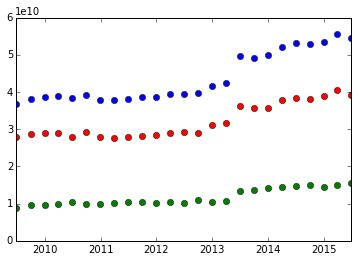

In [72]:
plt.plot_date(the_df.Date.values,the_df.apply(fag,args=('Assets',),axis=1).values)
plt.plot_date(the_df.Date.values,the_df.apply(fag,args=('Equity',),axis=1).values)
plt.plot_date(the_df.Date.values,the_df.apply(fag,args=('Liabilities',),axis=1).values)

In [58]:
the_df.iloc[0].xbrl.fields

{u'AccountsReceivable': 2513600000.0,
 u'Assets': 54641100000.0,
 'BalanceSheetDate': '2015-06-30',
 u'Cash': 1125800000.0,
 u'Changed': 20,
 u'CommitmentsAndContingencies': 0,
 u'ComprehensiveIncome': 494600000.0,
 u'ComprehensiveIncomeAttributableToNoncontrollingInterest': 2800000.0,
 u'ComprehensiveIncomeAttributableToParent': 491800000.0,
 u'CostOfRevenue': 12282500000.0,
 u'CostsAndExpenses': 15084300000.0,
 u'CurrentAssets': 12982100000.0,
 u'CurrentLiabilities': 15801500000.0,
 u'DividendPerShare': 0,
 'DocumentType': '10-Q',
 u'EarningsPerShare': 2.1,
 u'Equity': 15467800000.0,
 u'EquityAttributableToNoncontrollingInterest': 61200000.0,
 u'EquityAttributableToParent': 15406600000.0,
 u'ExchangeGainsLosses': 0.0,
 u'ExtraordinaryItemsGainLoss': 0,
 u'FailedChecks': [u'IS3'],
 u'GrossProfit': 2958400000.0,
 u'IncomeBeforeEquityMethodInvestments': 1261600000.0,
 u'IncomeFromContinuingOperationsAfterTax': 734600000.0,
 u'IncomeFromContinuingOperationsBeforeTax': 1261600000.0,
 u'In

In [73]:
the_df

,Filings,Acc,Filing Date,Fileloc,xbrl,Date
0,10-Q,0001122304-15-000131,2015-08-04,/tmp/aet-20150630.xml,<pysec.util.xbrl.XBRL object at 0x107c21f90>,2015-06-30
1,10-Q,0001122304-15-000074,2015-04-28,/tmp/aet-20150331.xml,<pysec.util.xbrl.XBRL object at 0x1065550d0>,2015-03-31
2,10-Q,0001122304-14-000149,2014-10-28,/tmp/aet-20140930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f3d0>,2014-09-30
3,10-Q,0001122304-14-000126,2014-07-29,/tmp/aet-20140630.xml,<pysec.util.xbrl.XBRL object at 0x107c2f150>,2014-06-30
4,10-Q,0001122304-14-000067,2014-04-24,/tmp/aet-20140331.xml,<pysec.util.xbrl.XBRL object at 0x107c2f510>,2014-03-31
5,10-Q,0001122304-13-000138,2013-10-29,/tmp/aet-20130930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f250>,2013-09-30
6,10-Q,0001122304-13-000123,2013-07-30,/tmp/aet-20130630.xml,<pysec.util.xbrl.XBRL object at 0x107c2f890>,2013-06-30
7,10-Q,0001122304-13-000067,2013-04-30,/tmp/aet-20130331.xml,<pysec.util.xbrl.XBRL object at 0x107c2ff10>,2013-03-31
8,10-Q,0001122304-12-000143,2012-10-25,/tmp/aet-20120930.xml,<pysec.util.xbrl.XBRL object at 0x107c2f650>,2012-09-30
9,10-Q,0001122304-12-000122,2012-07-31,/tmp/aet-20120630.xml,<pysec.util.xbrl.XBRL object at 0x10680a2d0>,2012-06-30


In [87]:
def get_date(row):
    print row.xbrl.fields

In [88]:
the_df.apply(get_date,axis=1)

{u'NetCashFlowsContinuing': -294600000.0, u'NetCashFlowsFinancingDiscontinued': 0.0, u'NetIncomeAvailableToCommonStockholdersBasic': 731800000.0, u'NonoperatingIncomeLossPlusInterestAndDebtExpense': 1261600000.0, u'EarningsPerShare': 2.1, u'NoncurrentLiabilities': 23371800000.0, u'IncomeFromContinuingOperationsBeforeTax': 1261600000.0, u'Equity': 15467800000.0, 'DocumentType': '10-Q', u'NetCashFlowsOperatingContinuing': 1729100000.0, u'AccountsReceivable': 2513600000.0, u'ExtraordinaryItemsGainLoss': 0, u'OtherComprehensiveIncome': -240000000.0, u'ComprehensiveIncomeAttributableToNoncontrollingInterest': 2800000.0, u'NetCashFlowsInvestingContinuing': -530200000.0, u'NetIncomeAttributableToParent': 731800000.0, u'NetCashFlowsInvestingDiscontinued': 0.0, u'NonoperatingIncomePlusInterestAndDebtExpensePlusIncomeFromEquityMethodInvestments': 1261600000.0, u'NetCashFlowsOperating': 1729100000.0, u'CostsAndExpenses': 15084300000.0, u'DividendPerShare': 0, u'CurrentAssets': 12982100000.0, u'In

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
0     None
1     None
2     None
3     None
4     None
5     None
dtype: object

In [93]:
tenk_df

,Filings,Acc,Filing Date,Fileloc,xbrl,Date
5,10-K,0001122304-10-000024,2010-02-26,/tmp/aet-20091231.xml,<pysec.util.xbrl.XBRL object at 0x10684ed50>,2009-12-31
4,10-K,0001122304-11-000032,2011-02-25,/tmp/aet-20101231.xml,<pysec.util.xbrl.XBRL object at 0x10684ecd0>,2010-12-31
3,10-K,0001122304-12-000045,2012-02-24,/tmp/aet-20111231.xml,<pysec.util.xbrl.XBRL object at 0x106560c50>,2011-12-31
2,10-K,0001122304-13-000037,2013-02-19,/tmp/aet-20121231.xml,<pysec.util.xbrl.XBRL object at 0x106560ed0>,2012-12-31
1,10-K,0001122304-14-000037,2014-02-28,/tmp/aet-20131231.xml,<pysec.util.xbrl.XBRL object at 0x10651bd10>,2013-12-31
0,10-K,0001122304-15-000038,2015-02-27,/tmp/aet-20141231.xml,<pysec.util.xbrl.XBRL object at 0x106560e10>,2014-12-31
